In [2]:
## import required functions
from __future__ import division, print_function
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imsave
from skimage.morphology import skeletonize
from skimage.measure import regionprops
from scipy.ndimage import binary_fill_holes

%matplotlib inline

##--------------------------------------------------------------

def remove_unwanted_objects(labeled_img, keep_ids):
    
    '''...'''
    
    clean_img = np.copy(labeled_img)
    all_ids = np.unique(labeled_img)
    
    for i in all_ids:
        if i not in keep_ids:
            clean_img[labeled_img == i] = 0
    
    return clean_img

##--------------------------------------------------------------

def suture_segmentation_repair(labeled_img, obj_ids, subarrs, bboxes, bg_val = 0):
    
    '''...'''
    
    repaired = np.zeros_like(labeled_img)
    len_diff = len(obj_ids) - len(subarrs)
    
    for i in range(len(obj_ids)):
        i_id = obj_ids[i]
        
        if i_id != bg_val:
            mask = subarrs[i - len_diff]
            plt.imshow(mask.sum(axis = 0))
            plt.show()
            
            i_repair = binary_fill_holes(mask).astype(int)
            i_repair = ((i_repair/np.amax(i_repair)) * i_id).astype(labeled_img.dtype)
            
            plt.imshow(i_repair.sum(axis = 0))
            plt.show()
            
            d0_l, d1_l, d2_l, d0_h, d1_h, d2_h = bboxes[i-len_diff]
            repaired[d0_l:d0_h, d1_l:d1_h, d2_l:d2_h] = repaired[d0_l:d0_h, d1_l:d1_h, d2_l:d2_h] + i_repair
        else:
            continue
    
    return repaired



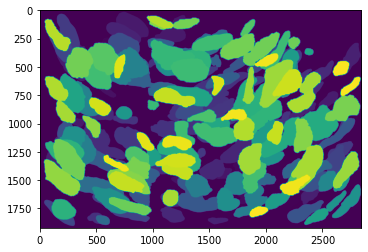

In [3]:
fpath = r'/Users/ryan/Desktop/bapn2'
img_fname = r'E15.5_BAPN_dataset2_segmentation samples.tif'
ids_fname = f'E15.5_BAPN_dataset2_segmentation retained IDs.npy'

labeled_img = imread(os.path.join(fpath, img_fname))
obj_ids = np.load(os.path.join(fpath, ids_fname))

plt.imshow(labeled_img.max(axis = 0))
plt.show()

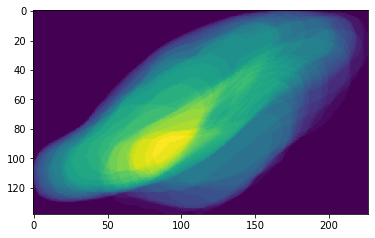

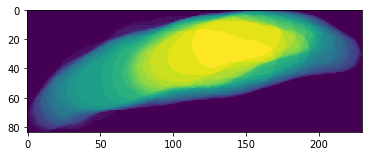

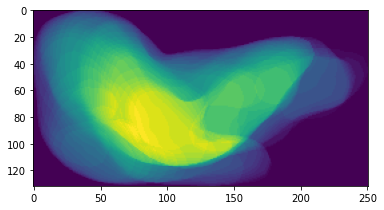

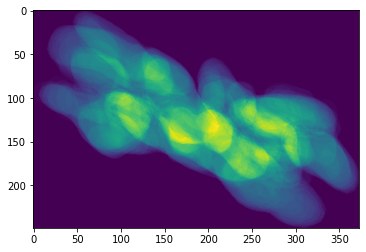

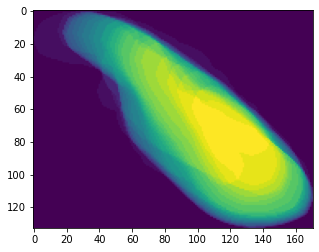

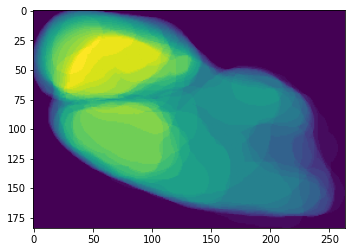

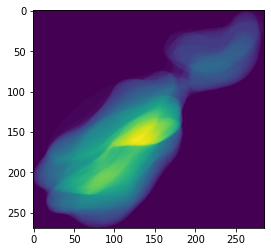

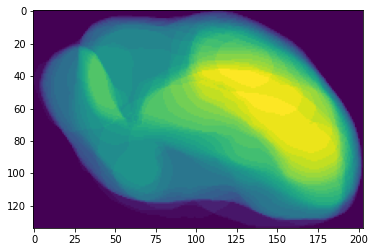

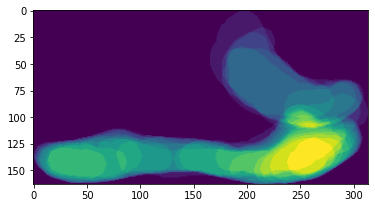

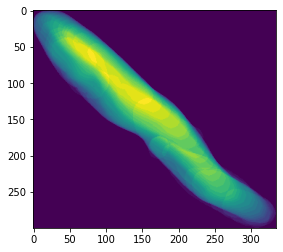

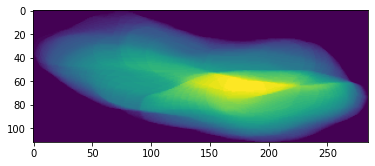

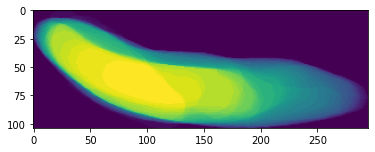

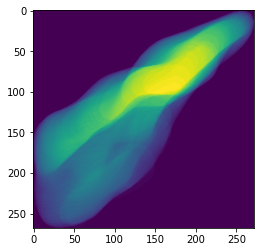

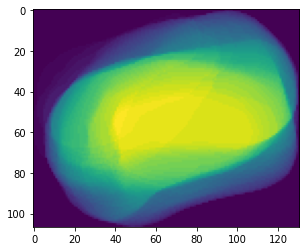

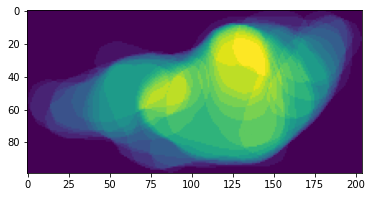

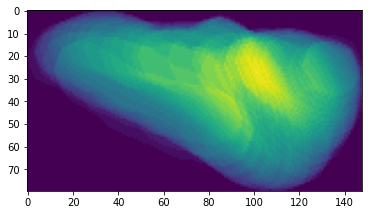

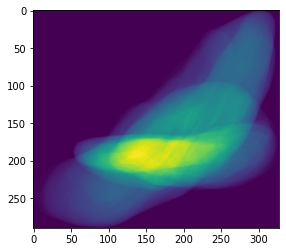

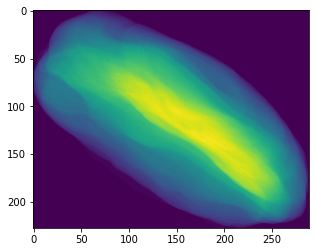

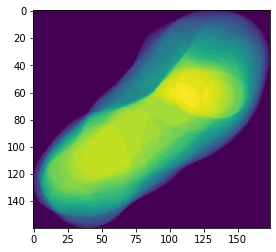

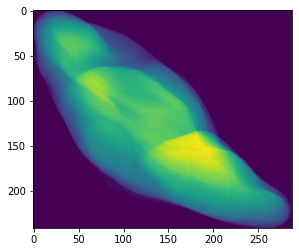

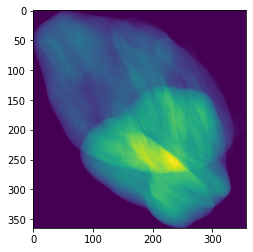

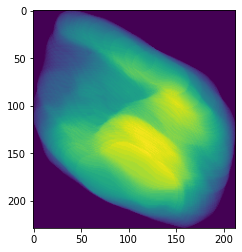

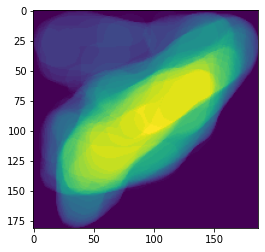

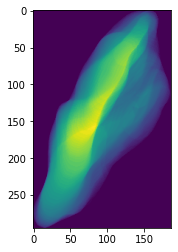

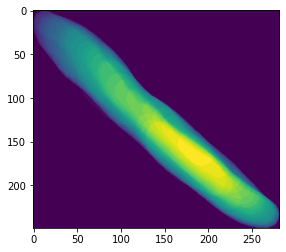

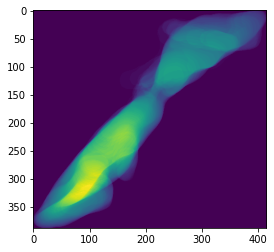

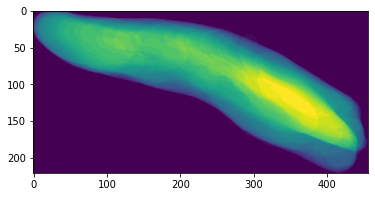

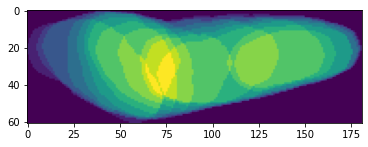

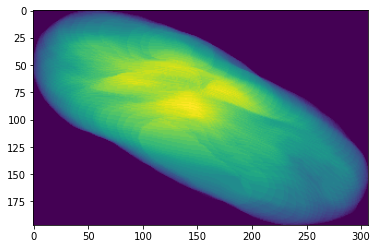

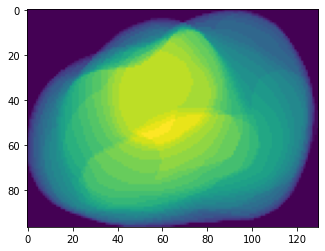

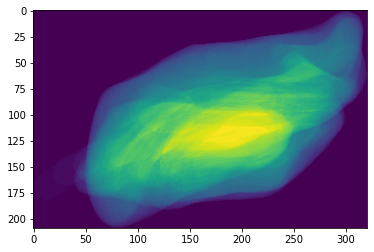

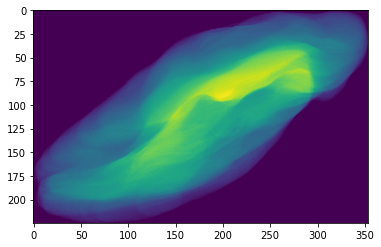

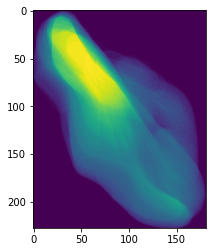

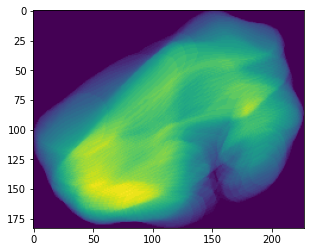

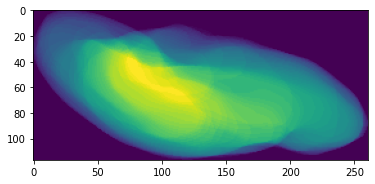

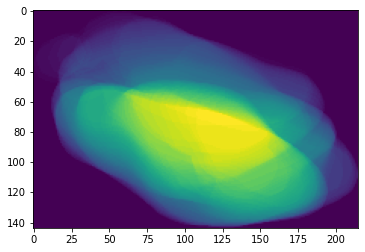

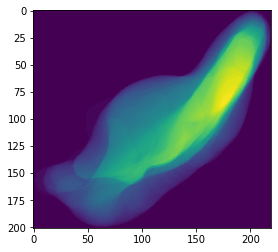

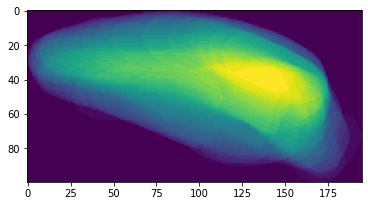

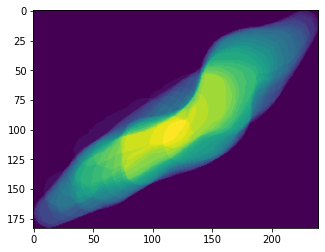

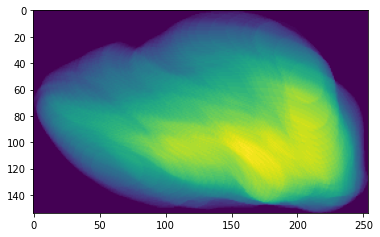

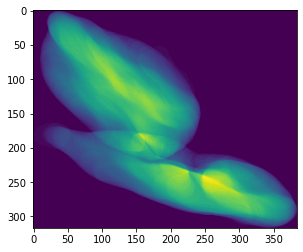

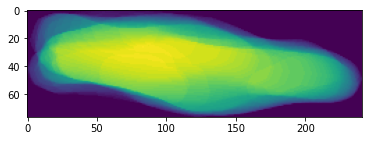

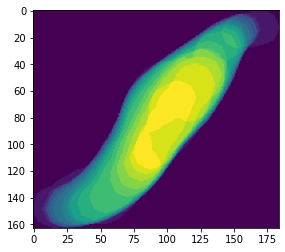

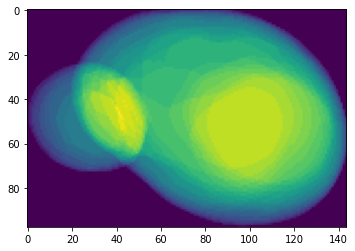

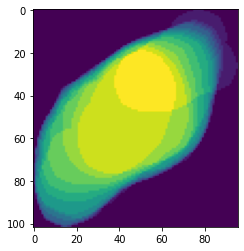

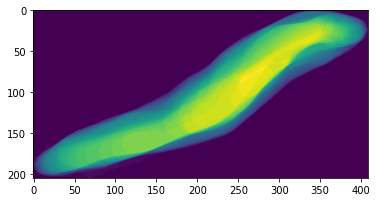

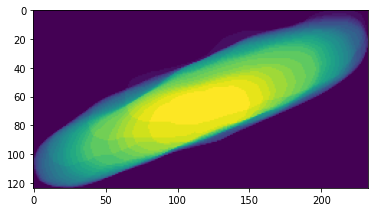

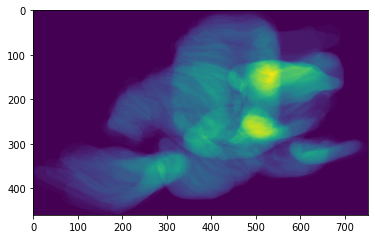

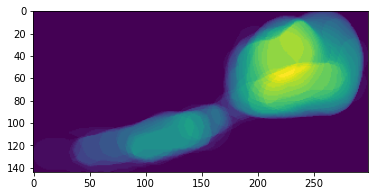

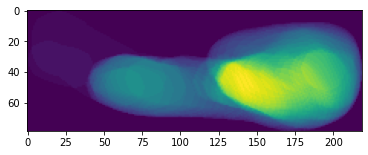

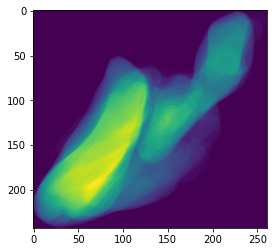

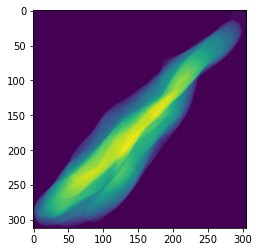

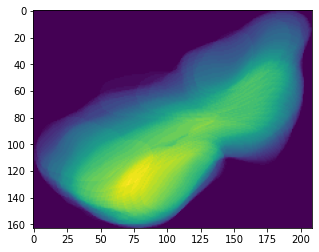

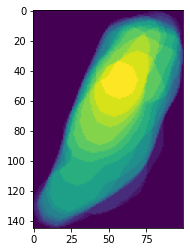

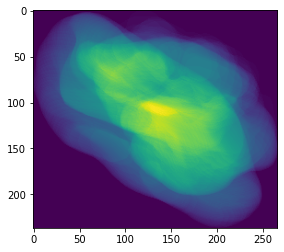

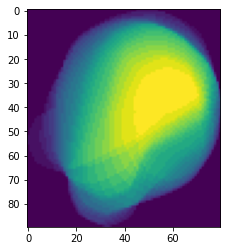

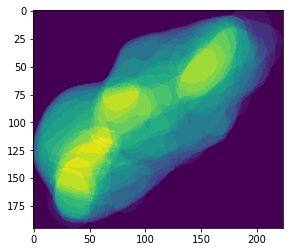

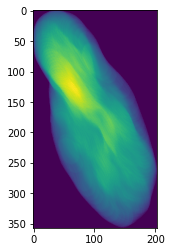

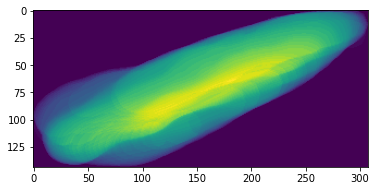

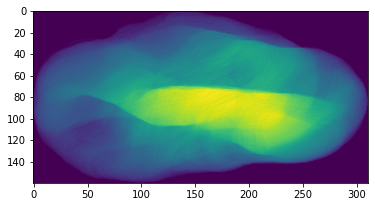

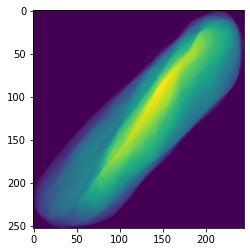

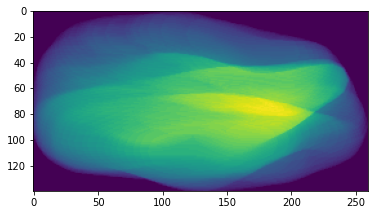

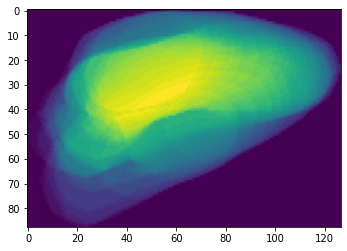

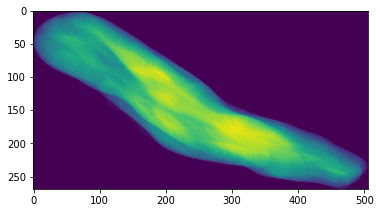

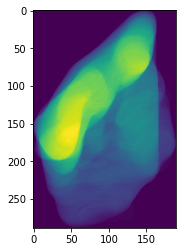

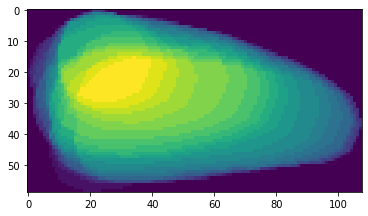

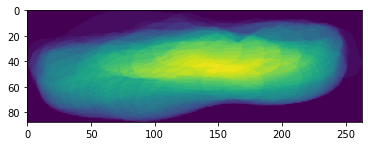

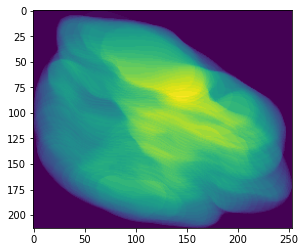

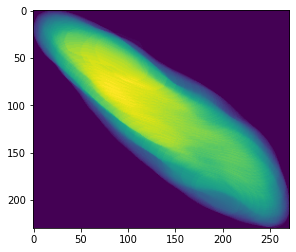

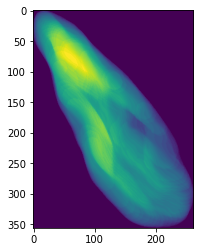

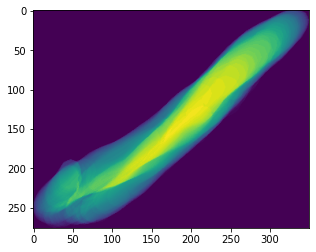

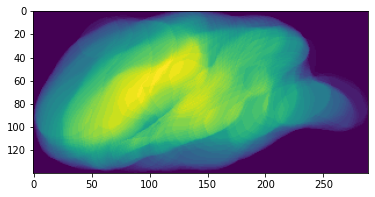

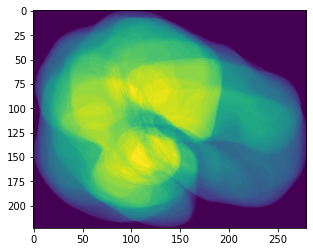

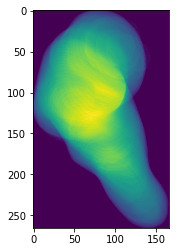

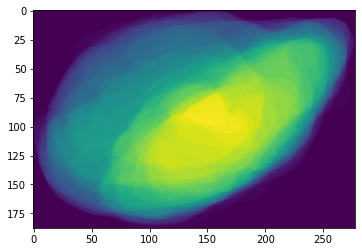

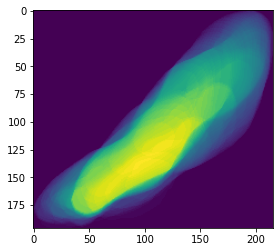

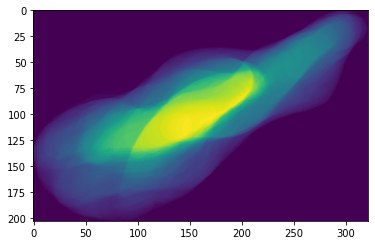

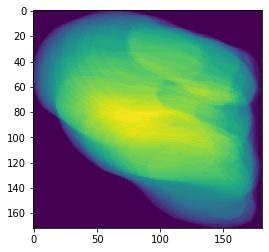

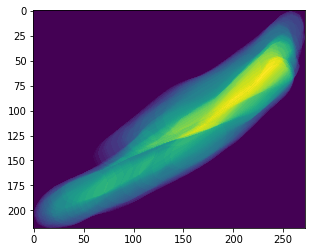

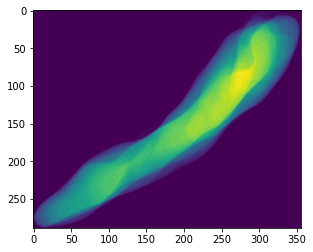

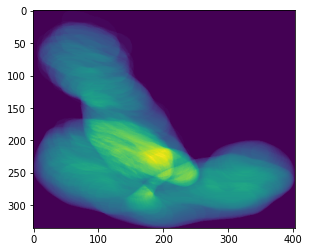

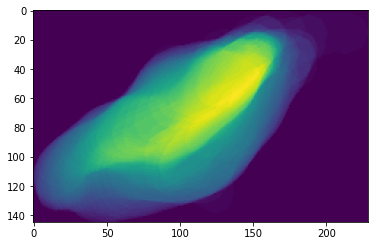

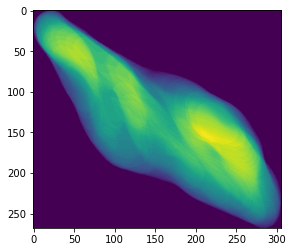

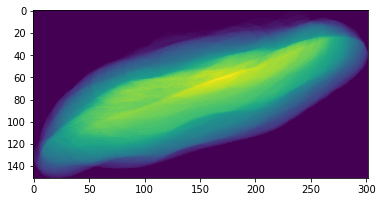

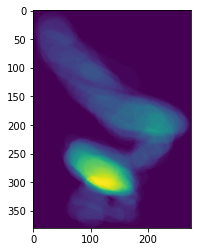

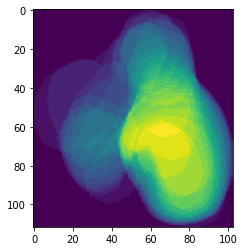

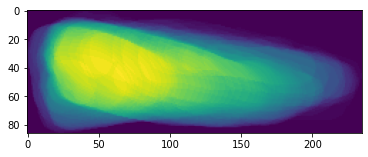

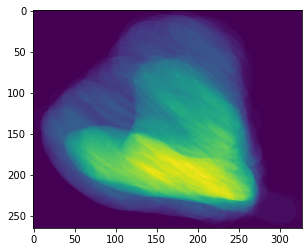

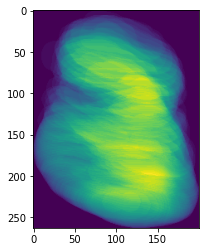

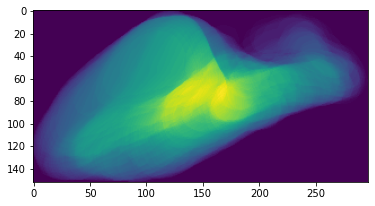

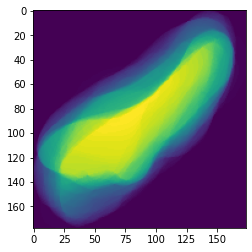

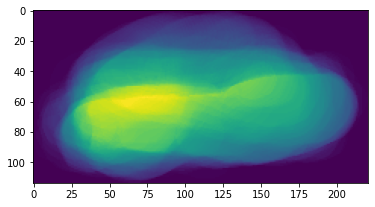

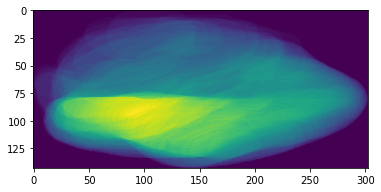

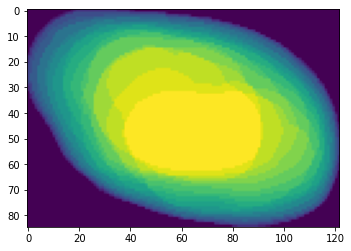

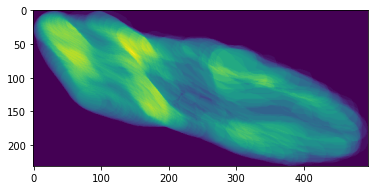

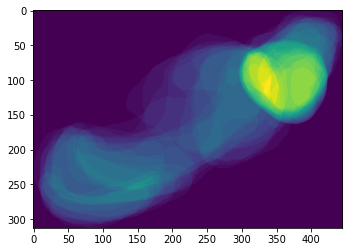

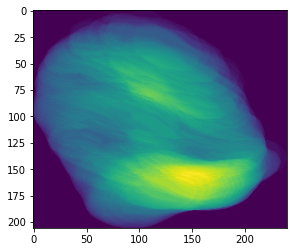

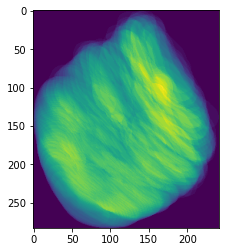

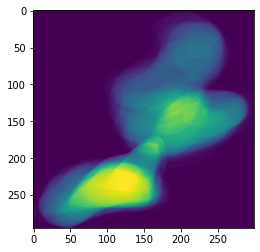

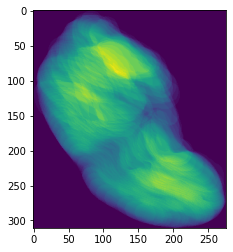

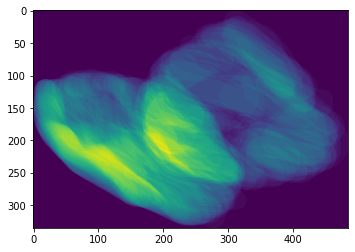

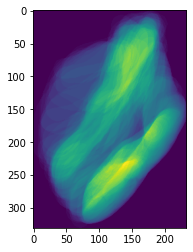

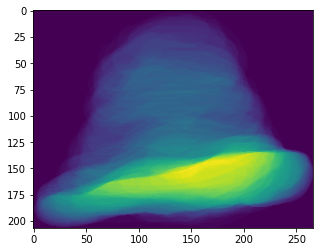

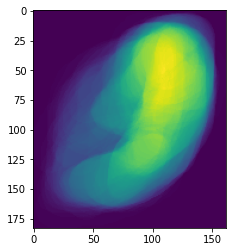

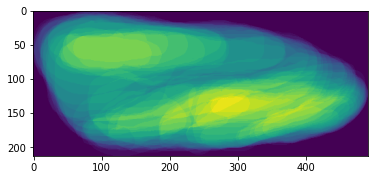

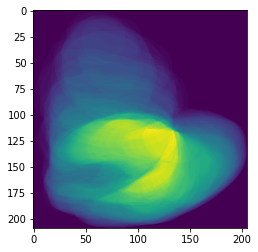

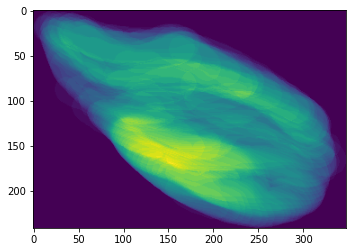

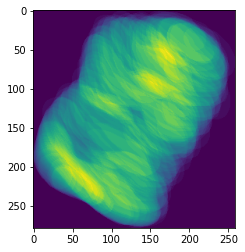

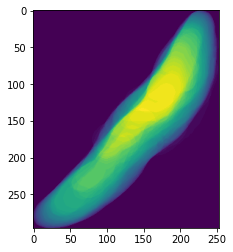

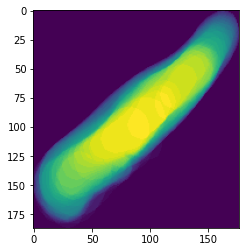

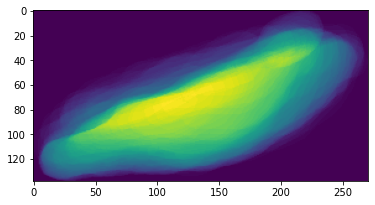

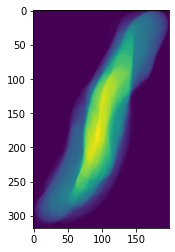

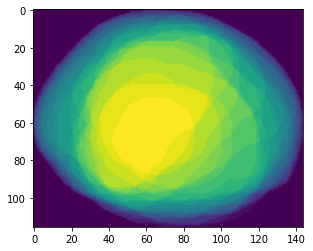

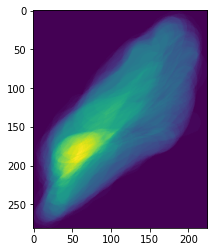

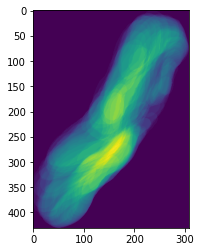

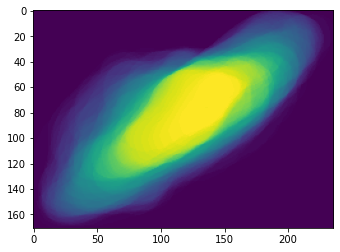

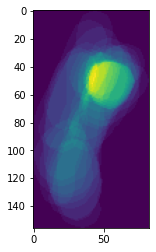

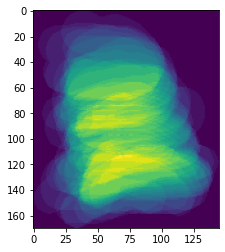

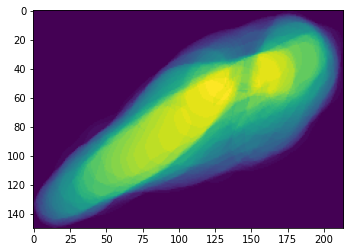

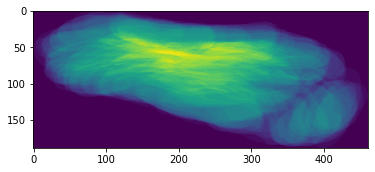

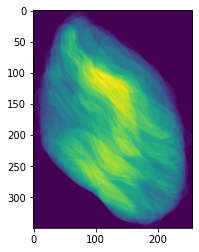

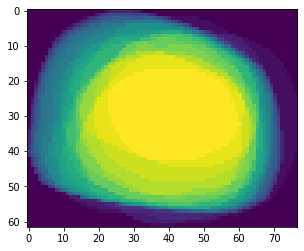

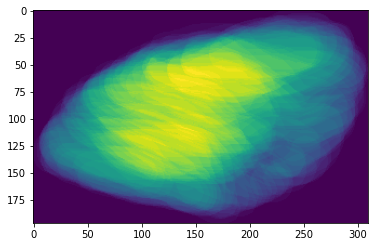

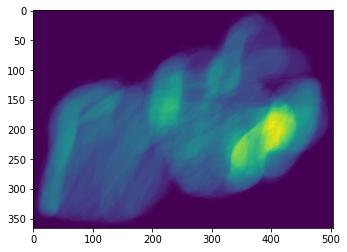

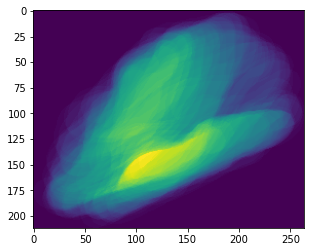

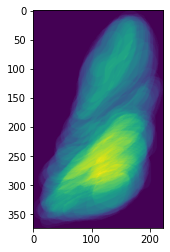

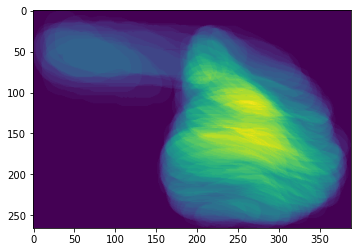

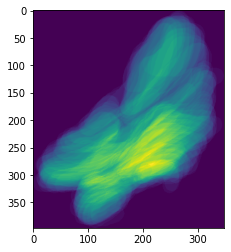

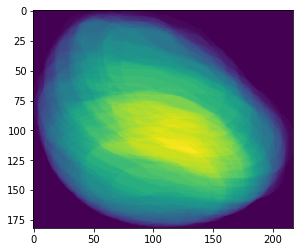

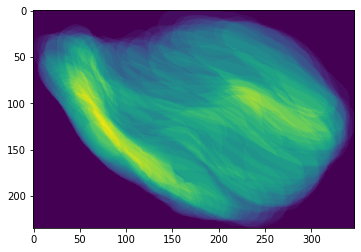

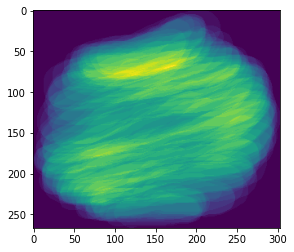

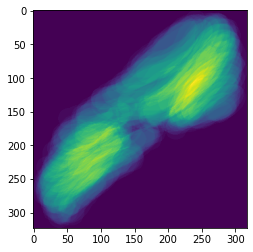

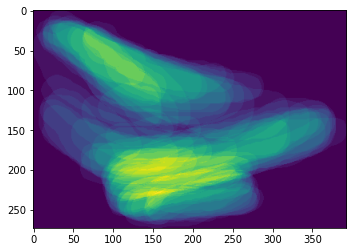

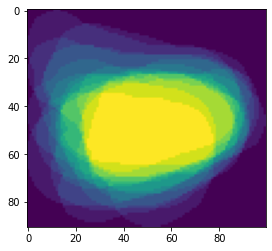

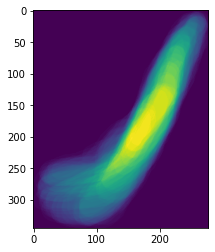

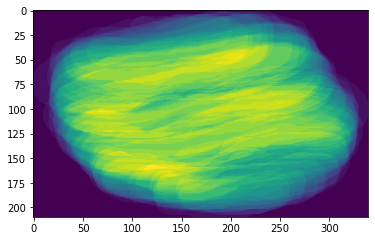

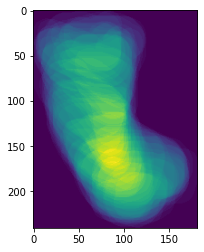

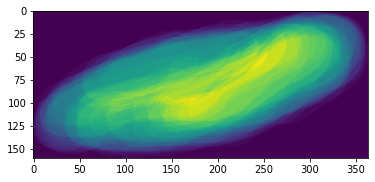

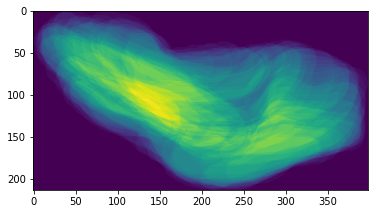

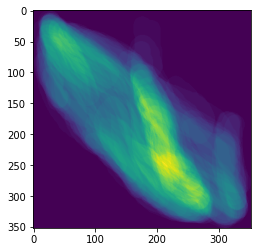

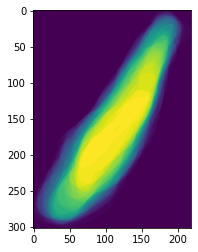

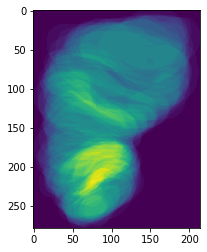

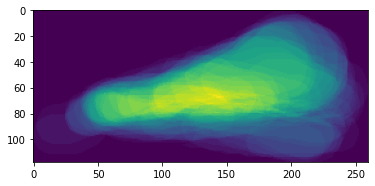

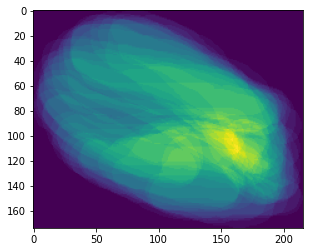

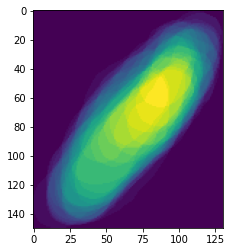

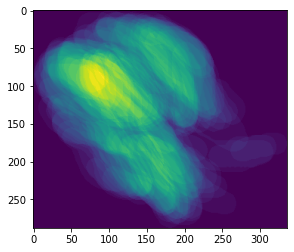

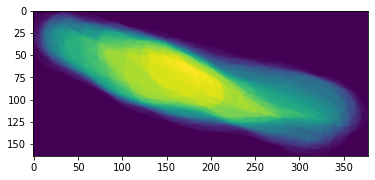

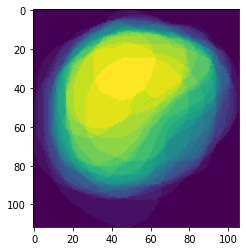

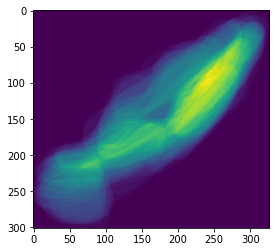

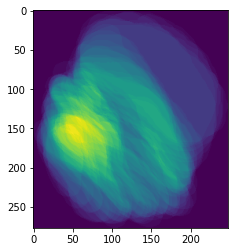

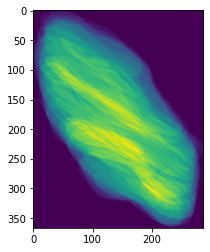

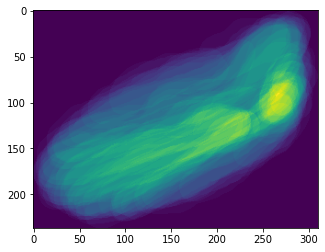

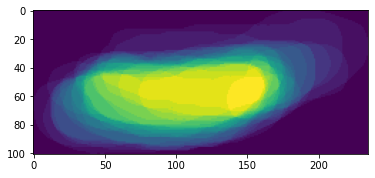

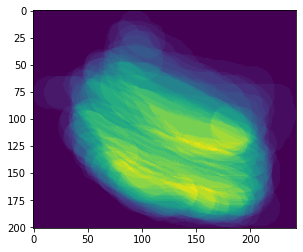

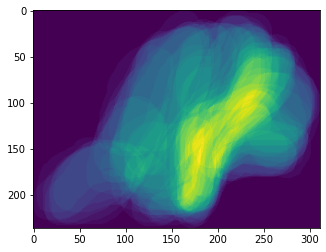

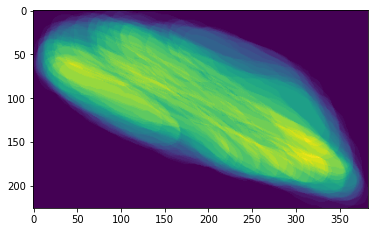

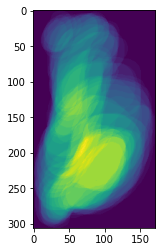

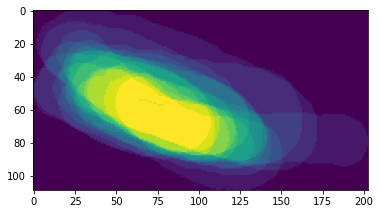

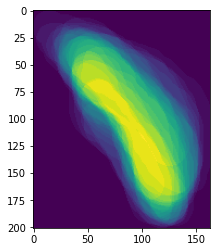

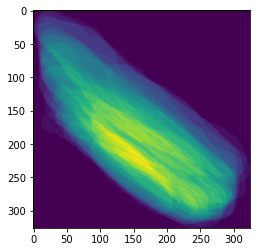

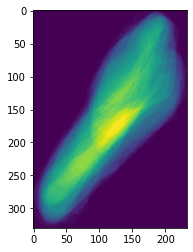

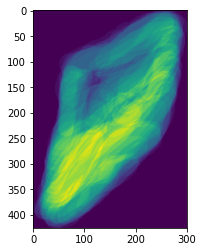

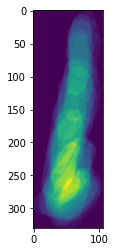

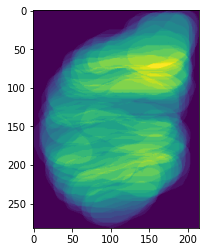

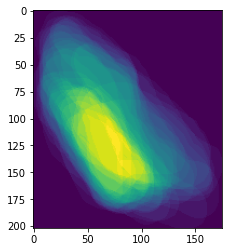

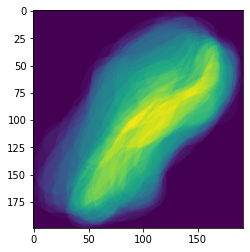

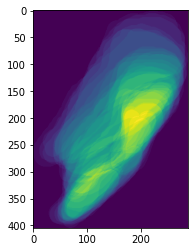

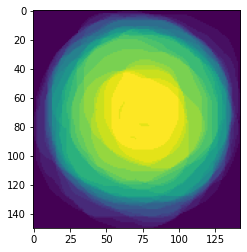

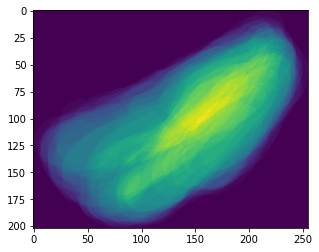

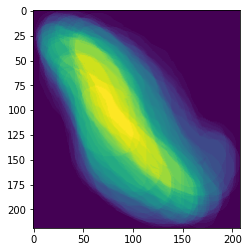

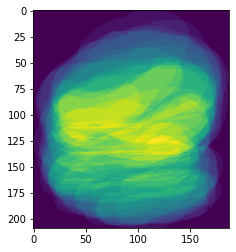

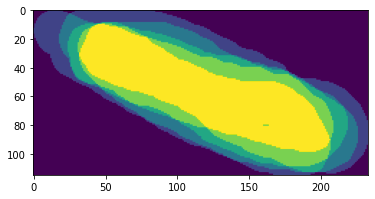

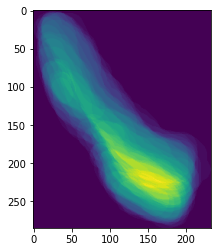

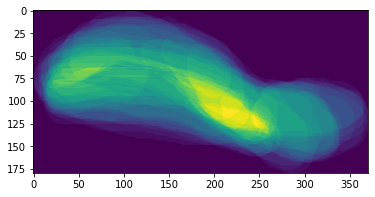

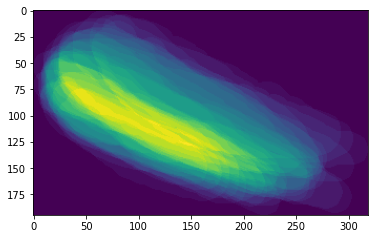

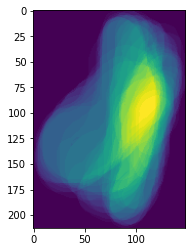

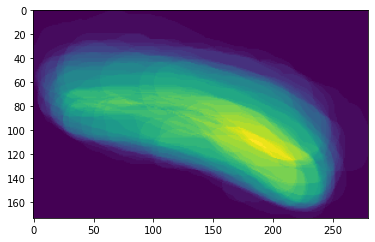

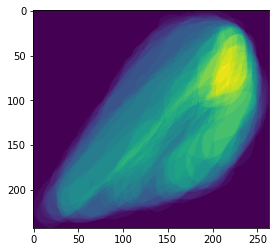

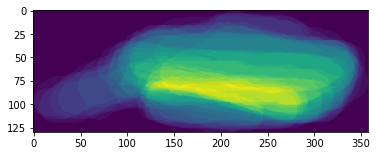

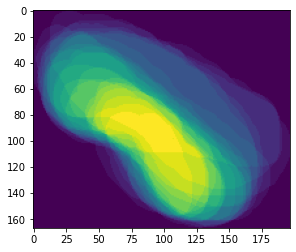

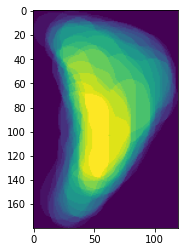

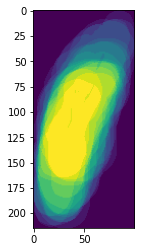

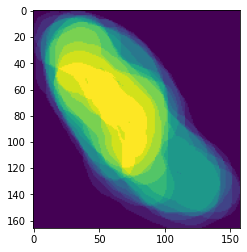

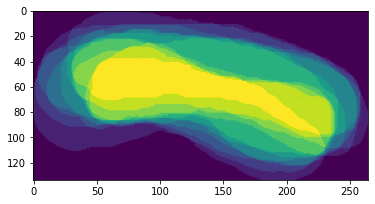

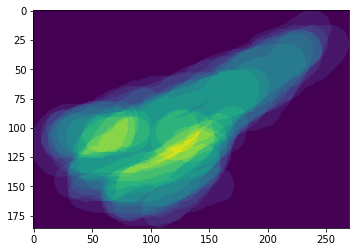

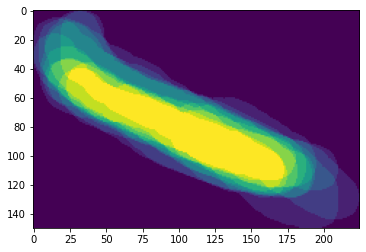

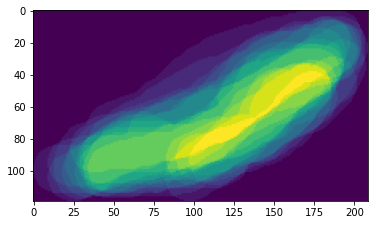

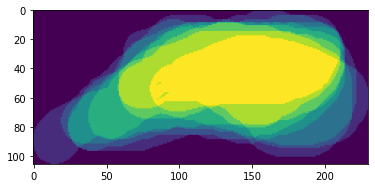

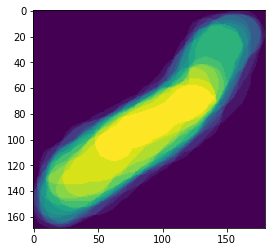

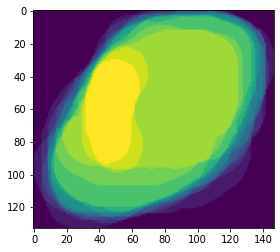

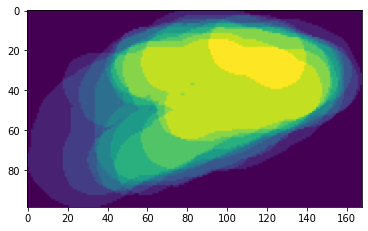

In [8]:
reg_props = regionprops(labeled_img)
subarrs = [0] * len(reg_props)
bboxes = [0] * len(reg_props)
counter = 0
for i in reg_props:
    subarrs[counter] = i['image']
    bboxes[counter] = i['bbox']
    counter += 1
    
filled = suture_segmentation_repair(labeled_img, obj_ids, subarrs, bboxes)
plt.imshow(filled.max(axis = 0))
plt.show()

(25, 1569, 1934, 57, 1707, 2161)


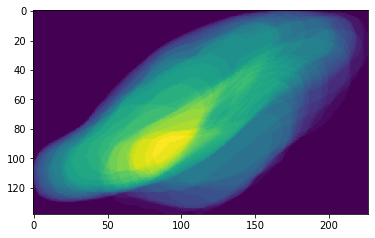

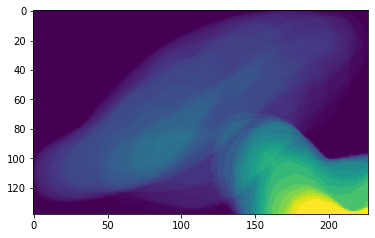

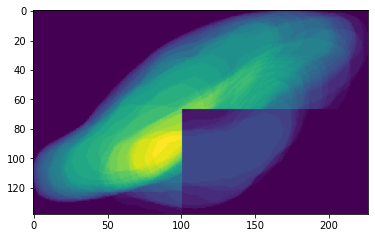

In [20]:
test = subarrs[0]
test_bbox = bboxes[0]
print(test_bbox)
plt.imshow(test.sum(axis = 0))
plt.show()

z0, y0, x0, z1, y1, x1 = test_bbox
plt.imshow(labeled_img[z0:z1, y0:y1, x0:x1].sum(axis = 0))
plt.show()

plt.imshow(filled[z0:z1, y0:y1, x0:x1].sum(axis = 0))
plt.show()

In [ ]:
reg_props = regionprops(filled)
subarrs = [0] * len(reg_props)
bboxes = [0] * len(reg_props)
counter = 0
for i in reg_props:
    subarrs[counter] = i['image']
    plt.imshow(subarrs[counter].sum(axis = 0))
    plt.show()
    bboxes[counter] = i['bbox']
    counter += 1
    
skels = suture_topskel_extract(filled, obj_ids, subarrs, bboxes)
plt.imshow(skels.max(axis = 0))
plt.show()